In [1]:
import pandas as pd
import numpy as np

In [2]:
data_f = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data_f.shape

(374, 13)

In [5]:
data_f.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
data_f.duplicated().sum()
# no duplicates

np.int64(0)

In [10]:
print(data_f.columns)
print(data_f['BMI Category'])

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: object


In [11]:
cat_cols = [col for col in data_f.columns if data_f[col].dtype == 'object']
num_cols = [col for col in data_f.columns if data_f[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [12]:
data_f[cat_cols].nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [13]:
data_f.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [14]:
(data_f==0).sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [19]:
data_f.drop(columns=['Person ID', 'Sleep Disorder'], inplace=True)
data_f.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


In [20]:
data_f.shape

(374, 11)

In [25]:
cat_cols = [col for col in data_f.columns if data_f[col].dtype == 'object']
num_cols = [col for col in data_f.columns if data_f[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


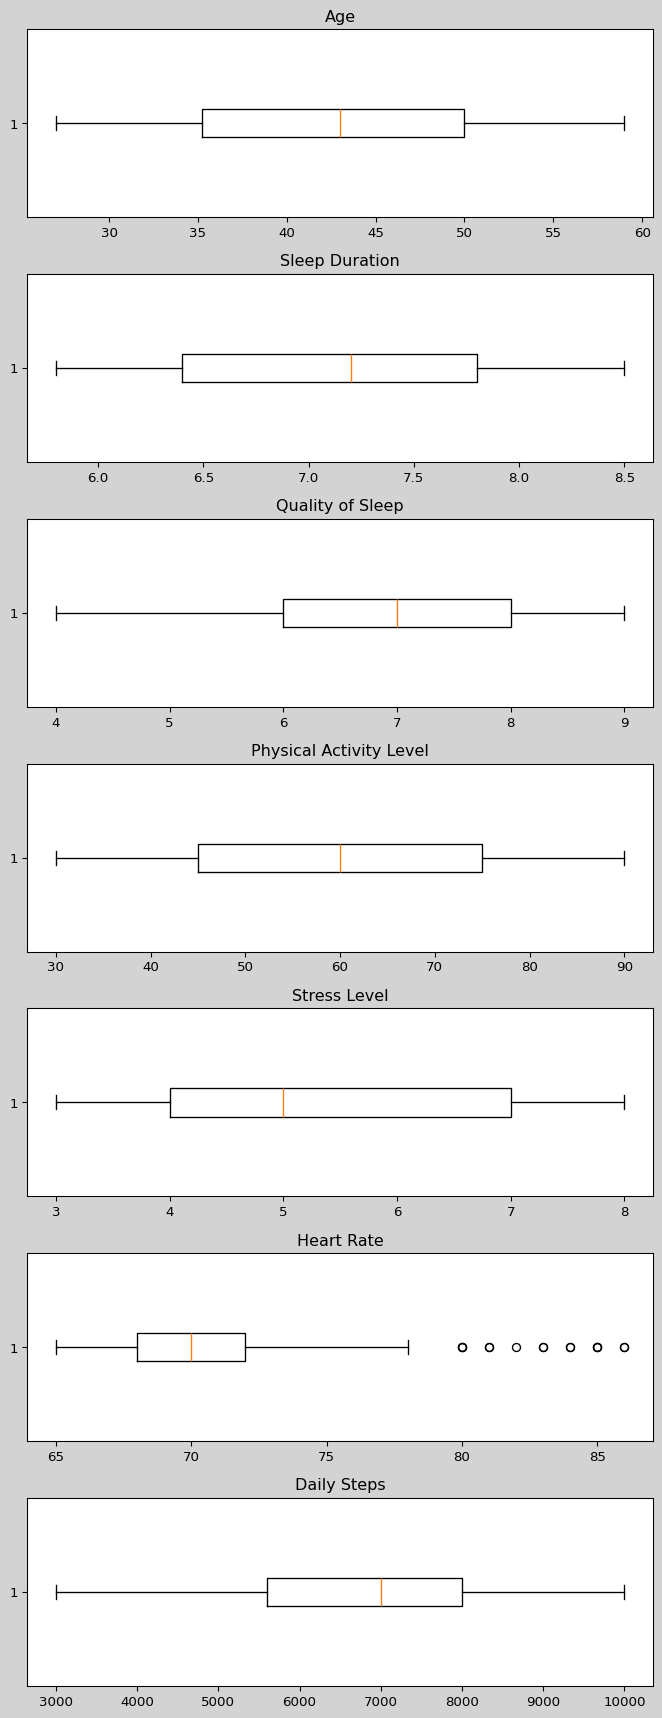

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(num_cols), 1, figsize=(7, 18), dpi=96) #inside(rows, columns, size, dots per inch)
for i, col in enumerate(num_cols):
    ax[i].boxplot(data_f[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
fig.set_facecolor("lightgrey") # Changes background color
plt.show()

In [32]:
data_f = pd.get_dummies(data_f, columns=['Gender'], drop_first=True)
print(data_f.head())

   Age            Occupation  Sleep Duration  Quality of Sleep  \
0   27     Software Engineer             6.1                 6   
1   28                Doctor             6.2                 6   
2   28                Doctor             6.2                 6   
3   28  Sales Representative             5.9                 4   
4   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps  Gender_Male  
0          77         4200         True  
1          75        10000         True  
2          75        10000         True  
3 

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a copy to avoid changing the original data
data_std = data_f.copy()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only numerical columns
data_std[num_cols] = scaler.fit_transform(data_f[num_cols])

# Check the result
print(data_std.head())

# Verify that the mean is ~0 and std is ~1
print("\nMeans after standardization:\n", data_std[num_cols].mean())
print("\nStandard deviations after standardization:\n", data_std[num_cols].std())


  Gender       Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male -1.753096     Software Engineer       -1.298887         -1.098280   
1   Male -1.637643                Doctor       -1.173036         -1.098280   
2   Male -1.637643                Doctor       -1.173036         -1.098280   
3   Male -1.637643  Sales Representative       -1.550588         -2.771424   
4   Male -1.637643  Sales Representative       -1.550588         -2.771424   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                -0.825418      0.347021   Overweight         126/83   
1                 0.039844      1.475592       Normal         125/80   
2                 0.039844      1.475592       Normal         125/80   
3                -1.402260      1.475592        Obese         140/90   
4                -1.402260      1.475592        Obese         140/90   

   Heart Rate  Daily Steps  
0    1.654719    -1.619584  
1    1.170474     1.970077  
2    1.1704